In [2]:
using PyPlot
pygui(true)


true

In [40]:
PyPlot.rcdefaults() # reset to default
PyPlot.close("all")

# Set global plotting parameters for PyPlot.jl
PyPlot.rc("font", size=12)      #family="serif",
# PyPlot.rc("axes", titlesize=18, labelsize=16)
# PyPlot.rc("xtick", labelsize=12)
# PyPlot.rc("ytick", labelsize=12)
PyPlot.rc("lines", linewidth=1.5)
size_py = 0.393701*[20, 15]     # figure size
size_py_wide = 0.393701*[20, 8]# figure size in cm
size_py_broad = 0.393701*[20, 12]# figure size in cm
res = 300                       # figure resolution (dpi)

300

In [4]:
# Import necessary packages
using Luna
import Luna: Hankel  
using LaTeXStrings
using FFTW
using DelimitedFiles
using FFTW
using DSP
using Polynomials
include(joinpath(pwd(), "MPC_functions.jl"))


reflecting_mirror2! (generic function with 1 method)

### PLOTTING MIRROR DATA

In [5]:
file_low_GDD_mir = joinpath("input", "mirrordata_0fs2.txt")
file_high_GDD_mir = joinpath("input", "mirrordata_-30fs2.txt")

data, header = readdlm(file_low_GDD_mir, '\t', header=true)

wl_low = data[:,1]
R_low = data[:,2]
GDD_low = data[:,3]


data, header = readdlm(file_high_GDD_mir, '\t', header=true)

wl_high = data[:,1]
R_high = data[:,2]
GDD_high = data[:,3]

251-element Vector{Float64}:
    274.602
    440.228
    633.096
    675.624
    288.78
   -409.266
   -796.979
   -692.267
   -414.619
   -191.07
      ⋮
  -1582.87
  -1927.75
  -2446.49
  -3360.49
  -5263.92
  -9981.52
 -24309.7
 -76885.0
 -98453.1

In [6]:
threshold = 98.0

first_idx = findfirst(x -> x > threshold, R_low)
last_idx = findlast(x -> x > threshold, R_low)

println(wl_low[first_idx])
println(R_low[first_idx])
println(wl_low[last_idx])

932.0
98.1862
1150.0


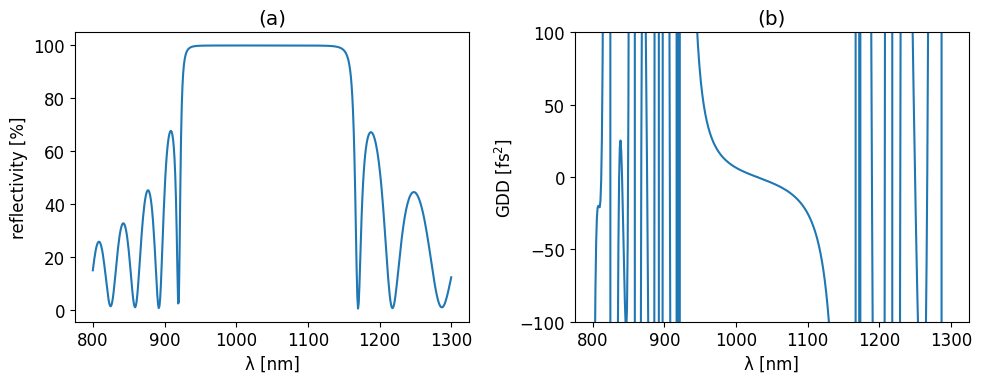

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot (a)
axs[1].plot(wl_low, R_low)
axs[1].set_title("(a)")
axs[1].set_xlabel("λ [nm]")
axs[1].set_ylabel("reflectivity [%]")

# Plot (b)
axs[2].plot(wl_low, GDD_low)
axs[2].set_title("(b)")
axs[2].set_xlabel("λ [nm]")
axs[2].set_ylabel("GDD [fs\$^2\$]")
# axs[2].set_xlim(925,1150)
axs[2].set_ylim(-100,100)
axs[2].set_yticks([-100,-50, 0, 50,100])


plt.tight_layout()
# plt.savefig(joinpath("@__DIR__", "..", "..", "..", "thesis", "mirr_low_GDD.png"), dpi=300, bbox_inches="tight")
plt.gcf()

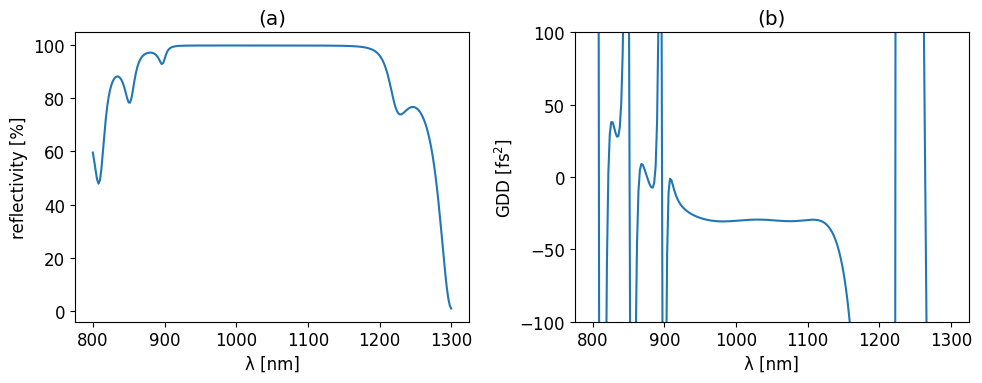

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot (a)
axs[1].plot(wl_high, R_high)
axs[1].set_title("(a)")
axs[1].set_xlabel("λ [nm]")
axs[1].set_ylabel("reflectivity [%]")

# Plot (b)
axs[2].plot(wl_high, GDD_high)
axs[2].set_title("(b)")
axs[2].set_xlabel("λ [nm]")
axs[2].set_ylabel("GDD [fs\$^2\$]")
# axs[2].set_xlim(925,1150)
axs[2].set_ylim(-100,100)
axs[2].set_yticks([-100,-50, 0, 50,100])

plt.tight_layout()
# plt.savefig(joinpath("@__DIR__", "..", "..", "..", "thesis", "mirr_high_GDD.png"), dpi=300, bbox_inches="tight")
plt.gcf()

### PLOTTING FROG INPUT

In [9]:
# What to plot                  
file_FROG_pulse = joinpath("input", "tangerine_FROG_50kHz") #joinpath("input", "20220505_retrievedpulse.txt")
# READ IN AND PREPARE FROG DATA 
data = readdlm(joinpath(file_FROG_pulse, "Speck.dat"))

λdat = data[:,1]     # read in wavelengths [nm]
indices = findall(x -> x >= 0, λdat)     # cut off negative wavelengths
λdat = λdat[indices]
ωdat = PhysData.wlfreq.(λdat*1e-9)  # calculate angular frequencies 

Eω_real = data[indices,4]   # read in real part of complex field
Eω_imag = data[indices,5]   # read in imaginary part of complex field
Eω_complex = Eω_real .+ 1im.*Eω_imag   # combine real and imaginary part
ϕω = blank_phase(ωdat, abs2.(Eω_complex), unwrap(angle.(Eω_complex)); level=0.05)

2048-element Vector{Float64}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

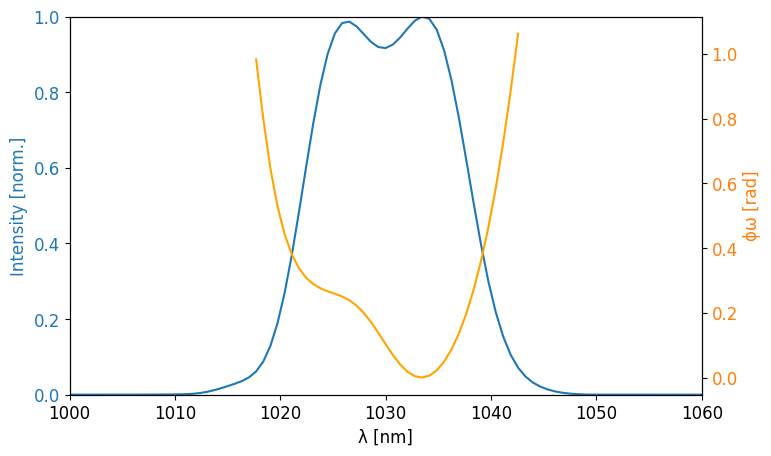

In [ ]:
# Plot complex spectral field

fig, ax1 = plt.subplots(figsize=size_py_broad)
# ax1.set_title("Complex frequency domain pulse")
ax1.plot(λdat, abs2.(Eω_complex), label="abs2", color="C0")
# ax1.plot(λdat, Maths.log10_norm(abs2.(Eω_complex)), label="abs2", color="C0")
# ax1.plot(λdat, real.(Eω_complex), label="real", marker="o")
# ax1.plot(λdat, imag.(Eω_complex), label="imaginary", marker="o")
ax2 = ax1.twinx()
#ax2.plot(λdat, angle.(Eω_complex[idx_min:idx_max]), label="phase", color="orange")
ax2.plot(λdat, ϕω, label="phase unrwapped", color="orange")

ax1.set_ylabel("Intensity [norm.]", color="C0")
ax1.tick_params(axis="y", labelcolor="C0")

ax2.set_ylabel("ϕω [rad]", color="C1")
ax2.tick_params(axis="y", labelcolor="C1")

# ax1.set_xlim(950, 1060)
ax1.set_xlim(1000, 1060)
ax1.set_xlabel("λ [nm]")
# ax1.set_ylim(-6,0)
ax1.set_ylim(0,1)
# ax1.legend(loc="upper left")
# ax2.legend(loc="upper right")
plt.tight_layout()
# plt.show()
# plt.savefig(joinpath("@__DIR__", "..", "..", "..", "thesis", "FROG_spectrum.png"), dpi=300, bbox_inches="tight")
plt.gcf()



In [11]:
# READ IN AND PREPARE FROG DATA 
data = readdlm(joinpath(file_FROG_pulse, "Ek.dat"))

tdat = data[:,1]     # read in wavelengths [nm]

Et_real = data[:,4]   # read in real part of complex field
Et_imag = data[:,5]   # read in imaginary part of complex field
Et_complex = Et_real .+ 1im.*Et_imag   # combine real and imaginary part

512-element Vector{ComplexF64}:
  -9.973669e-5 + 0.0001640537im
  0.0002380419 + 0.0005792661im
  -2.095079e-5 + 0.0002226907im
 -0.0006680059 + 0.0003704588im
  -5.277373e-5 + 0.0003439217im
   2.259151e-5 + 0.0007857231im
 -0.0002546567 + 0.0005174507im
   7.859195e-6 + 0.0006940606im
  -7.893558e-6 + 0.0007169726im
   7.253425e-5 + 0.000659909im
               ⋮
  -3.413289e-5 + 7.668007e-6im
  -3.445928e-5 - 3.994276e-6im
  -2.569598e-5 + 1.838654e-5im
  -9.132991e-5 - 3.410405e-5im
    -6.7767e-5 - 7.04724e-5im
  -5.742107e-5 + 2.481113e-5im
  -6.497258e-5 + 6.274842e-6im
 -0.0001780925 - 0.0001021088im
 -0.0001760709 - 9.013736e-5im

In [12]:
ϕt = blank_phase(tdat, abs2.(Et_complex), unwrap(angle.(Et_complex)); level=0.05)

512-element Vector{Float64}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

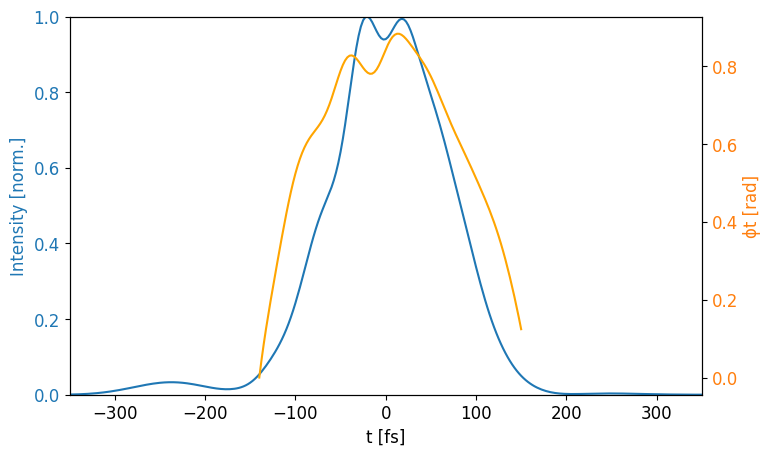

In [41]:
# Plot complex temporal field

fig, ax1 = plt.subplots(figsize=size_py_broad)
# ax1.set_title("Complex time domain pulse")
ax1.plot(tdat, abs2.(Et_complex), label="abs2", color="C0")
#ax1.plot(tdat, real.(Et_complex), label="real", marker="o")
#ax1.plot(tdat, imag.(Et_complex), label="imaginary", marker="o")
ax2 = ax1.twinx()
#ax2.plot(tdat, angle.(Et_complex[idx_min:idx_max]), label="phase", color="orange")
ax2.plot(tdat, ϕt, label="phase unrwapped", color="orange")

ax1.set_ylabel("Intensity [norm.]", color="C0")
ax1.tick_params(axis="y", labelcolor="C0")

ax2.set_ylabel("ϕt [rad]", color="C1")
ax2.tick_params(axis="y", labelcolor="C1")

ax1.set_xlim(-350, 350)
ax1.set_ylim(0,1)
ax1.set_xlabel("t [fs]")
# ax1.legend(loc="upper left")
# ax2.legend(loc="upper right")
plt.tight_layout()
# plt.show()
plt.savefig(joinpath("@__DIR__", "..", "..", "..", "thesis", "FROG_pulse.png"), dpi=300, bbox_inches="tight")
plt.gcf()

### PLOTTING HOW PULSE SHIFTS FROM LOW GDD MIRROR

In [14]:
# MPC PARAMETERS
Nrt = 15                        # number of round trips
Npass = 2 #2*Nrt                # number of passes

R = 200e-3                      # mirror radius of curvature [m]
k = Nrt-2                       # for k->Nrt MPC operation is closest to the stability edge and wm is maximized, reducing mirror damage 
L = R*(1-cos(pi*k/Nrt))         # MPC cell length [m] (see Anne-Lise Viotti, Multi-pass cells for post-compression of ultrashort laser pulses, 2022, https://doi.org/10.1364/OPTICA.449225)
C = L/R

# PULSE PARAMETERS
λ0 = 1030e-9        # central wavelength [m]
τ = 150e-15         # pulse duration [s]; ignored if FROG spectrum is used
E_pulse = 250e-6    # pulse energy [J]

0.00025

In [15]:
w0 = sqrt(λ0*L * sqrt((2*R/L -1)) /(2*pi))   #123.62e-6 #125e-6       # mode-matched waist for nonlinear regime
wm = w0*sqrt(2*R/(2*R-L))

0.0005554198741358596

In [16]:
# simulation grid parameters
λlims = (700e-9, 1400e-9) #(600e-9, 1500e-9) #(700e-9, 1400e-9) # # wavelength range of interest [m]
trange = 10*τ #10*τ #300.0e-15 #0.05e-12    # total extent of time window required [s] (NOTE: if this is too short, the range is extended automatically
Nz = 201                            # number of points along z at which the spectrum is saved

# Hankel transformation
R_Hankel = 3.0*wm           # aperture radius for Hankel transform (assume field ≈0 for r>R ) [m]  
N_Hankel = 64 #128 #256 #512 #1024             # sample size for Hankel tansform grid 

q = Hankel.QDHT(R_Hankel, N_Hankel, dim=2)                  # set up discrete Hankel transform matrix, transformation done along 2nd dimension 
q_1D = Hankel.QDHT(R_Hankel, N_Hankel, dim=1)               # to be applied to arrays that where integrated over ω, so r becomes 1rst dimension
r = q.r                         # sampled radii [m] from q excluding r=0 so that r = [r1, r2, ..., rn]
rsym = Hankel.Rsymmetric(q)     # sampled radii [m] mirrored around and including r=0 so that rsym = [–rn, ...-r2, -r1, 0, r1, r2, ..., rn]

grid = Grid.RealGrid(L, λ0, λlims, trange)               # set up time & space grid for gradient approximation
ω = grid.ω                      # sampled angular frequencies [rad/s];  NOTE: Nω = (Nt/2) + 1 !
f = ω./2π                      # sampled linear frequencies [Hz]
λ = PhysData.wlfreq.(ω)         # sampled wavelengths [m]
λ[1] = 1.0                        # avoid "Inf" value for DC frequency
t = grid.t                      # sampled points in time [s];           NOTE: Nt = 2*(Nω-1) !

energyfun, energyfun_ω = Fields.energyfuncs(grid, q)    # "energyfun" gives total energy in a field E(t); energyfun_ω is needed in case field is defined via FROG spectrum  


┌ Info: Freq limits 0.21 - 0.43 PHz
└ @ Luna.Grid C:\Users\muelderk\.julia\packages\Luna\7FAkO\src\Grid.jl:40
┌ Info: Samples needed: 3854.47, samples: 4096, δt = 389.16 as
└ @ Luna.Grid C:\Users\muelderk\.julia\packages\Luna\7FAkO\src\Grid.jl:44
┌ Info: Requested time window: 1500.0 fs, actual time window: 1594.0 fs
└ @ Luna.Grid C:\Users\muelderk\.julia\packages\Luna\7FAkO\src\Grid.jl:46
┌ Info: Grid: samples 2048 / 4096, ωmax 4.04e+15 / 8.07e+15
└ @ Luna.Grid C:\Users\muelderk\.julia\packages\Luna\7FAkO\src\Grid.jl:78


(Luna.Fields.var"#energy_t#32"{Luna.Grid.RealGrid, Hankel.QDHT{0, 1, Float64}}(Luna.Grid.RealGrid(0.38270909152852023, 1.03e-6, [-7.96995811460118e-13, -7.96217495237989e-13, -7.954391790158599e-13, -7.94660862793731e-13, -7.938825465716019e-13, -7.931042303494729e-13, -7.923259141273438e-13, -7.915475979052148e-13, -7.907692816830859e-13, -7.899909654609568e-13  …  7.892126492388278e-13, 7.899909654609568e-13, 7.907692816830859e-13, 7.915475979052148e-13, 7.923259141273438e-13, 7.931042303494729e-13, 7.938825465716019e-13, 7.94660862793731e-13, 7.954391790158599e-13, 7.96217495237989e-13], [0.0, 3.941793179357254e12, 7.883586358714508e12, 1.1825379538071762e13, 1.5767172717429016e13, 1.970896589678627e13, 2.3650759076143523e13, 2.7592552255500777e13, 3.153434543485803e13, 3.547613861421528e13  …  4.0009200770476125e15, 4.00486187022697e15, 4.008803663406327e15, 4.0127454565856845e15, 4.0166872497650415e15, 4.020629042944399e15, 4.024570836123756e15, 4.0285126293031135e15, 4.0324544224

In [17]:
# CREATE DATAFIELD (taken from https://github.com/LupoLab/Luna.jl/issues/357)
df = Fields.DataField(ωdat, Eω_complex; energy=1) # energy is irrelevant here as we will rescale again
Eω = df(grid, nothing) # second argument is unused for DataField (need the planned FT for other types)

Eωr = Eω .* sqrt.(Maths.gauss.(q.r, w0/2))' # combine with spatial distribution; beam waist taken from above calculation

Eωk = q * Eωr                              # transform to reciprocal space
Eωk .*= sqrt(E_pulse)/sqrt(energyfun_ω(Eωk)) # rescale to actual energy

Fields.prop!(Eωk, -L/2, grid, q)           # from the waist linearly propagate back by -L/2 (to mirror position)

1025×64 Matrix{ComplexF64}:
  0.0+0.0im   0.0+0.0im   0.0+0.0im  …   0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0-0.0im   0.0+0.0im  -0.0+0.0im      0.0-0.0im   0.0-0.0im   0.0-0.0im
  0.0+0.0im   0.0-0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im   0.0+0.0im   0.0-0.0im      0.0-0.0im   0.0-0.0im   0.0-0.0im
 -0.0+0.0im   0.0+0.0im   0.0+0.0im     -0.0+0.0im  -0.0+0.0im  -0.0+0.0im
  0.0-0.0im  -0.0+0.0im   0.0-0.0im  …   0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0-0.0im   0.0+0.0im   0.0+0.0im     -0.0+0.0im  -0.0+0.0im  -0.0+0.0im
  0.0-0.0im   0.0+0.0im   0.0-0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0-0.0im  -0.0+0.0im   0.0+0.0im      0.0-0.0im   0.0-0.0im   0.0-0.0im
  0.0-0.0im   0.0-0.0im   0.0-0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
     ⋮                               ⋱                          
  0.0+0.0im   0.0+0.0im   0.0+0.0im      0.0-0.0im   0.0+0.0im   0.0-0.0im
  0.0+0.0im   0.0+0.0im   0.0+0.0im      0.0-0.0im   0.0+0.0im   0.0-0.0im
  0.0+0

In [18]:
# mirror data
path_m1 = joinpath("input", "mirrordata_0fs2.txt") # "mirrordata_0fs2.txt"; "mirror_R_100_GDD_0fs2.txt"; "mirror_R_data_GDD_0fs2.txt"
path_m2 = joinpath("input", "mirrordata_-30fs2.txt") # "mirrordata_-30fs2.txt"; "mirror_R_100_GDD_-30fs2.txt"; "mirror_R_data_GDD_-30fs2.txt"


"input\\mirrordata_-30fs2.txt"

In [19]:
# ---------------- DEFINE MIRRORS ----------------

# MIRROR 1
data = readdlm(path_m1, skipstart=1)

λ_m1 = data[:,1].*1e-9     # read in wavelengths [m]
R_m1 = data[:,2].*1e-2     # read in reflectivity [fractions]
GDD_m1 = data[:,3].*1e-30  # read in GDD [s^2]

# for planck taper function
windowwidth1 = 20e-9
λ_min1 = minimum(λ_m1)+windowwidth1
λ_max1 = maximum(λ_m1)-windowwidth1

# add additional group delay if necessary
delay1 = nothing #200e-15


# MIRROR 2
data = readdlm(path_m2, skipstart=1)

λ_m2 = data[:,1].*1e-9     # read in wavelengths [m]
R_m2 = data[:,2].*1e-2     # read in reflectivity [fractions]
GDD_m2 = data[:,3].*1e-30  # read in GDD [s^2]

# for planck taper function
windowwidth2 = 20e-9
λ_min2 = minimum(λ_m2)+windowwidth2
λ_max2 = maximum(λ_m2)-windowwidth2

# add additional group delay if necessary
delay2 = nothing

In [20]:
Eωr = q \ Eωk

1025×64 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
    ⋮                             ⋱                        
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0

In [21]:
N_refl = 6
Eωr1 = copy(Eωr)
It1 = Vector{Vector{Float64}}(undef, N_refl)  # Store full intensity arrays

for i in 1:N_refl
    if i !== 1
        reflecting_mirror1!(Eωr1)
    end
    
    Eω1 = zeros(ComplexF64, (size(Eωr1, 1)))      # set up new array for Ẽω = Ẽ(ω, z); COMPLEX electric field amplitude in FREQUENCY domain INTEGRATED along r (from 0 to infinity to my knowledge)
        
    for i = 1:size(Eωr, 1)
        Eω1[i] = Hankel.integrateR(Eωr1[i,:], q)             # integrate along r (technically: k)
    end
    Et1 = FFTW.irfft(Eω1, length(t))
    Eta1 = Maths.hilbert(Et1)

    It1[i] = abs2.(Eta1)
end

Applying reflectivity and GDD data of mirror 1...done.
Applying reflectivity and GDD data of mirror 1...done.
Applying reflectivity and GDD data of mirror 1...done.
Applying reflectivity and GDD data of mirror 1...done.
Applying reflectivity and GDD data of mirror 1...done.


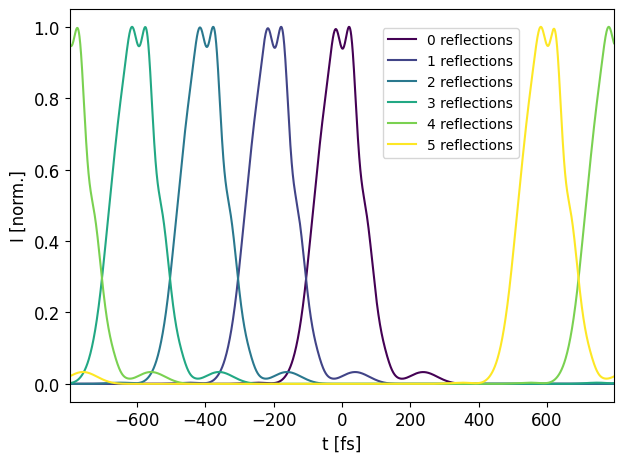

In [22]:
cmap = PyPlot.get_cmap("viridis")  # Try also "plasma", "magma", "cividis", "tab10"
colors = [cmap((i-1)/(N_refl-1)) for i in 1:N_refl]

figure()
# title("Pulse after multiple reflections")
for i in 1:N_refl
    plot(t .* 1e15, Maths.normbymax(It1[i]), label="$(i-1) reflections", color=colors[i])
end
plt.xlim(minimum(t).*1e15, maximum(t).*1e15)
xlabel("t [fs]")
ylabel("I [norm.]")
legend(loc="upper center", bbox_to_anchor=(0.7, 0.97), fontsize=10)  # Adjust position as needed
tight_layout()
# plt.savefig(joinpath("@__DIR__", "..", "..", "..", "thesis", "refl_low_GDD.png"), dpi=300, bbox_inches="tight")
gcf()

In [23]:
N_refl = 6
Eωr2 = copy(Eωr)
It2 = Vector{Vector{Float64}}(undef, N_refl)  # Store full intensity arrays

for i in 1:N_refl
    if i !== 1
        reflecting_mirror2!(Eωr2)
    end
    
    Eω2 = zeros(ComplexF64, (size(Eωr2, 1)))      # set up new array for Ẽω = Ẽ(ω, z); COMPLEX electric field amplitude in FREQUENCY domain INTEGRATED along r (from 0 to infinity to my knowledge)
        
    for i = 1:size(Eωr2, 1)
        Eω2[i] = Hankel.integrateR(Eωr2[i,:], q)             # integrate along r (technically: k)
    end
    Et2 = FFTW.irfft(Eω2, length(t))
    Eta2 = Maths.hilbert(Et2)

    It2[i] = abs2.(Eta2)
end

Applying reflectivity and GDD data of mirror 2...done.
Applying reflectivity and GDD data of mirror 2...done.
Applying reflectivity and GDD data of mirror 2...done.
Applying reflectivity and GDD data of mirror 2...done.
Applying reflectivity and GDD data of mirror 2...done.


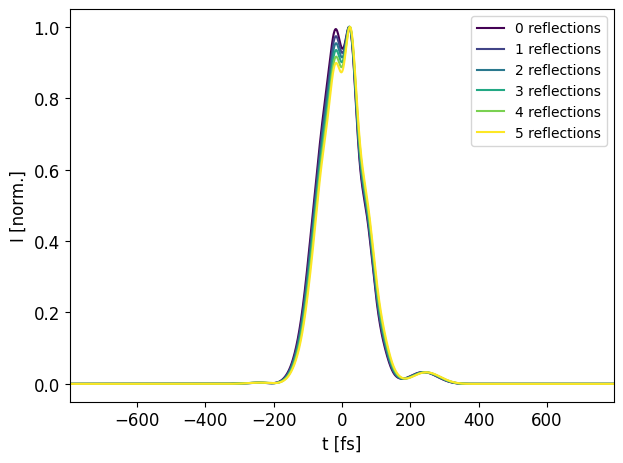

In [24]:
cmap = PyPlot.get_cmap("viridis")  # Try also "plasma", "magma", "cividis", "tab10"
colors = [cmap((i-1)/(N_refl-1)) for i in 1:N_refl]

figure()
# title("Pulse after multiple reflections")
for i in 1:N_refl
    plot(t .* 1e15, Maths.normbymax(It2[i]), label="$(i-1) reflections", color=colors[i])
end
plt.xlim(minimum(t).*1e15, maximum(t).*1e15)
xlabel("t [fs]")
ylabel("I [norm.]")
legend(loc="upper right", fontsize=10)  # Adjust position as needed
tight_layout()
# plt.savefig(joinpath("@__DIR__", "..", "..", "..", "thesis", "refl_high_GDD.png"), dpi=300, bbox_inches="tight")
gcf()

## PLOTTING MIRROR PHASE

### LOW GDD MIRROR

In [25]:
# PROCESSING GDD DATA

ω = PhysData.wlfreq.(λ_m1)          # converting wavelengths to angular frequencies
ω0 = PhysData.wlfreq(λ0)    # central frequency around which fit is done
ωfs = ω*1e-15                       # converting to fs to work with polynomial fit
ωfs0 = PhysData.wlfreq(λ0)*1e-15    # central frequency around which fit is done

# GD_m1 = Maths.cumtrapz(GDD_m1, ω)                     # GD data is integrated once
# idx = argmin(abs.(ω .- ω0))                     # finding GD at central frequency
# GD_m1 = GD_m1 .- GD_m1[idx]                              # subtracting residual GD at central frequency


ϕ = Maths.cumtrapz(Maths.cumtrapz(GDD_m1, ω), ω)   # GDD data is integrated twice to get whole phase
                                                # GDD is defined as the second derivative of the phase

fitorder = 5
p = Polynomials.fit(ωfs .- ωfs0, ϕ, fitorder)   # phase from GDD data is fitted
ϕ_fit = p.(ωfs .- ωfs0)   

501-element Vector{Float64}:
   12.134017167993683
   11.394558248270398
   10.661737253590145
    9.93649977954579
    9.219743172913676
    8.512317934478364
    7.815029089787088
    7.1286375284994845
    6.453861312989601
    5.7913769568416145
    ⋮
  943.6536449633717
  953.5603674636337
  963.5349811837013
  973.5776320401565
  983.688464882331
  993.8676234936896
 1004.1152505932911
 1014.4314878372128
 1024.8164758200746

In [26]:
p[2:end] = 0 # polynomials use 0-based indexing - only use constant and linear term
println(p)

ϕ_nonlin = ϕ .- p.(ωfs .- ωfs0) # subtract linear part from phase
ϕspl = Maths.BSpline(λ_m1, ϕ)

42.259 - 3.91778*x


Luna.Maths.RealBSpline{Dierckx.Spline1D, Vector{Float64}, Luna.Maths.FastFinder{Vector{Float64}, Float64}}(Spline1D(knots=[8.0e-7,8.02e-7 … 1.298e-6,1.3e-6] (499 elements), k=3, extrapolation="extrapolate", residual=0.0), [0.0, 0.0, 0.0, 0.0], [6.95187831255107e-310, 6.95187831255107e-310, 6.95187831255107e-310, 6.95187831255107e-310], Luna.Maths.FastFinder{Vector{Float64}, Float64}([8.000000000000001e-7, 8.02e-7, 8.030000000000001e-7, 8.04e-7, 8.05e-7, 8.060000000000001e-7, 8.070000000000001e-7, 8.08e-7, 8.09e-7, 8.100000000000001e-7  …  1.2900000000000001e-6, 1.291e-6, 1.292e-6, 1.2930000000000002e-6, 1.294e-6, 1.295e-6, 1.2960000000000002e-6, 1.297e-6, 1.2980000000000001e-6, 1.3e-6], 8.000000000000001e-7, 1.3e-6, 499, 0, -Inf))

In [27]:
# Filter the data within the desired range
mask = (ωfs .> 1.65) .& (ωfs .< 2.0)
ω_subset = ωfs[mask]
ϕ_subset = ϕ_nonlin[mask]

# Shift x-axis to center around ω0fs
x = ω_subset .- ωfs0

p = Polynomials.fit(ω_subset .- ωfs0, ϕ_subset, 2)   # phase from GDD data is fitted

println(p)  # [a, b]

12.6086 - 198.668*x - 0.82037*x^2


In [28]:
PhysData.wlfreq(1170e-9)

1.6099586045374812e15

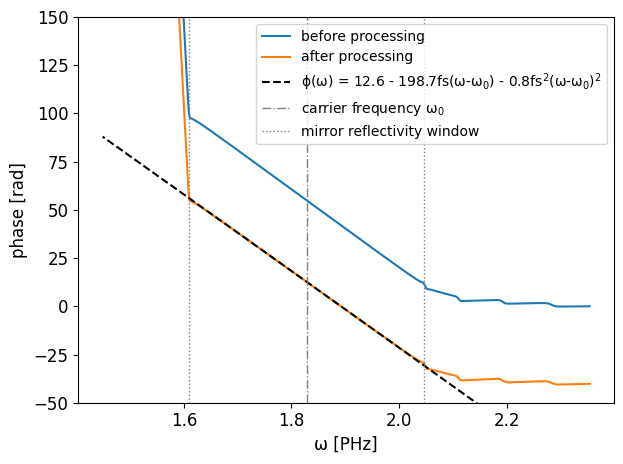

In [29]:
plt.figure()
# plt.title("Phase before and after removing linear terms")
plt.plot(ωfs, ϕ, label="before processing")
plt.plot(ωfs, ϕ_nonlin, label="after processing")
plt.plot(ωfs, p.(ωfs.- ωfs0), linestyle="dashed", color="black", label="ϕ(ω) = 12.6 - 198.7fs(ω-ω\$_0\$) - 0.8fs\$^2\$(ω-ω\$_0)^2\$")#12.6 - 198.7*ω")
plt.axvline(ωfs0, linestyle="-.", color="grey", linewidth="1", label="carrier frequency ω\$_0\$")
plt.axvline(2.0474473557704925, linestyle="dotted", color="grey", linewidth="1", label="mirror reflectivity window")
plt.axvline(1.6099586045374812, linestyle="dotted", color="grey", linewidth="1")#, label="≙ 1170 nm")
plt.xlabel("ω [PHz]")
plt.ylabel("phase [rad]")
plt.ylim(-50,150)
plt.legend(fontsize=10)
plt.tight_layout()
# plt.savefig(joinpath("@__DIR__", "..", "..", "..", "thesis", "phase_low_GDD.png"), dpi=300, bbox_inches="tight")
display(gcf())

### HIGH GDD MIRROR

In [30]:
# PROCESSING GDD DATA

ω = PhysData.wlfreq.(λ_m2)          # converting wavelengths to angular frequencies
ω0 = PhysData.wlfreq(λ0)    # central frequency around which fit is done
ωfs = ω*1e-15                       # converting to fs to work with polynomial fit
ωfs0 = PhysData.wlfreq(λ0)*1e-15    # central frequency around which fit is done

ϕ = Maths.cumtrapz(Maths.cumtrapz(GDD_m2, ω), ω)   # GDD data is integrated twice to get whole phase
                                                # GDD is defined as the second derivative of the phase

fitorder = 5
p = Polynomials.fit(ωfs .- ωfs0, ϕ, fitorder)   # phase from GDD data is fitted
ϕ_fit = p.(ωfs .- ωfs0)   

251-element Vector{Float64}:
   0.07066348095123243
   0.08005406706222619
   0.09028500425972742
   0.10121494125446781
   0.11271224401017768
   0.12465450651768804
   0.1369280824459144
   0.14942763683547197
   0.16205571703340618
   0.1747223420991654
   ⋮
 -11.110083365298083
 -11.291415793240116
 -11.474924889952758
 -11.66062098897477
 -11.848514293396498
 -12.038614875892272
 -12.230932678775224
 -12.425477514074052
 -12.622259063631697

In [31]:
p[2:end] = 0 # polynomials use 0-based indexing - only use constant and linear term
println(p)

ϕ_nonlin = ϕ .- p.(ωfs .- ωfs0) # subtract linear part from phase
ϕspl = Maths.BSpline(λ_m2, ϕ)

-0.90334 + 6.5883*x


Luna.Maths.RealBSpline{Dierckx.Spline1D, Vector{Float64}, Luna.Maths.FastFinder{Vector{Float64}, Float64}}(Spline1D(knots=[8.0e-7,8.04e-7 … 1.296e-6,1.3e-6] (249 elements), k=3, extrapolation="extrapolate", residual=0.0), [0.0, 0.0, 0.0, 0.0], [1.2415534677633e-311, 1.2415534679056e-311, 1.241553468048e-311, 6.95187831255107e-310], Luna.Maths.FastFinder{Vector{Float64}, Float64}([8.000000000000001e-7, 8.04e-7, 8.060000000000001e-7, 8.08e-7, 8.100000000000001e-7, 8.12e-7, 8.140000000000001e-7, 8.16e-7, 8.18e-7, 8.200000000000001e-7  …  1.28e-6, 1.2820000000000002e-6, 1.2840000000000001e-6, 1.286e-6, 1.288e-6, 1.2900000000000001e-6, 1.292e-6, 1.294e-6, 1.2960000000000002e-6, 1.3e-6], 8.000000000000001e-7, 1.3e-6, 249, 0, -Inf))

In [33]:
# Filter the data within the desired range
mask = (ωfs .> 1.65) .& (ωfs .< 2.0)
ω_subset = ωfs[mask]
ϕ_subset = ϕ_nonlin[mask]

# Shift x-axis to center around ω0fs
x = ω_subset .- ωfs0

p = Polynomials.fit(ω_subset .- ωfs0, ϕ_subset, 2)   # phase from GDD data is fitted

println(p)  # [a, b]

-0.0550259 + 1.86219*x - 15.0024*x^2


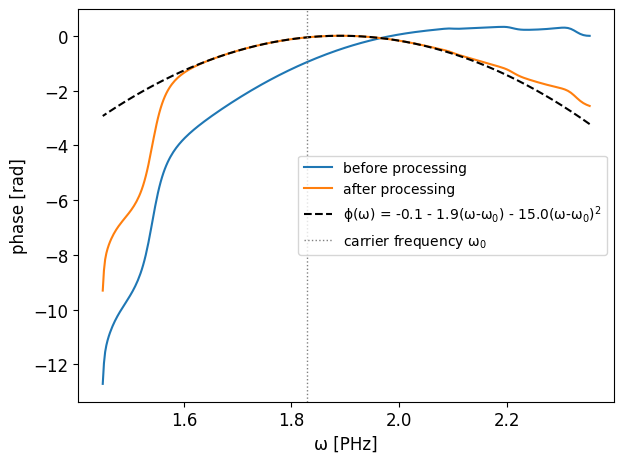

In [34]:
plt.figure()
# plt.title("Phase before and after removing linear terms")
plt.plot(ωfs, ϕ, label="before processing")
plt.plot(ωfs, ϕ_nonlin, label="after processing")
plt.plot(ωfs, p.(ωfs.- ωfs0), linestyle="dashed", label="ϕ(ω) = -0.1 - 1.9(ω-ω\$_0\$) - 15.0(ω-ω\$_0)^2\$", color="black")
plt.axvline(ωfs0, linestyle="dotted", color="grey", linewidth="1", label="carrier frequency ω\$_0\$")
plt.xlabel("ω [PHz]")
plt.ylabel("phase [rad]")
# plt.ylim(-50,125)
plt.legend(loc="center right",fontsize=10)
plt.tight_layout()
# plt.savefig(joinpath("@__DIR__", "..", "..", "..", "thesis", "phase_high_GDD.png"), dpi=300, bbox_inches="tight")
display(gcf())